In [43]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)


In [44]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("spectra.csv")
X, y = np.array(data)[:, 1:], np.array(data)[:, 0]

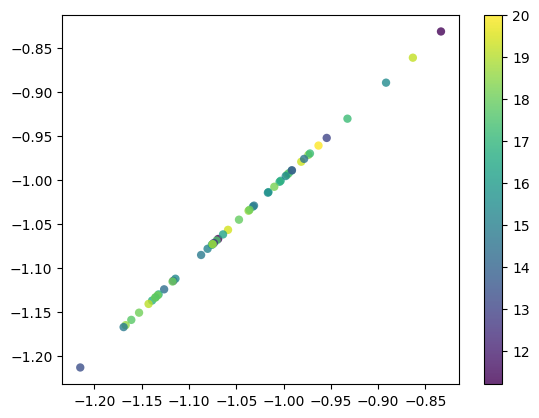

In [45]:
x1 = X[:, 0]
x2 = X[:, 1]

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.viridis)

plt.colorbar()
plt.show()

In [46]:
# Project the data onto the 2 primary principal components
pca = PCA(600)
pca.fit(X)
X_projected = pca.transform(X)

In [53]:
print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


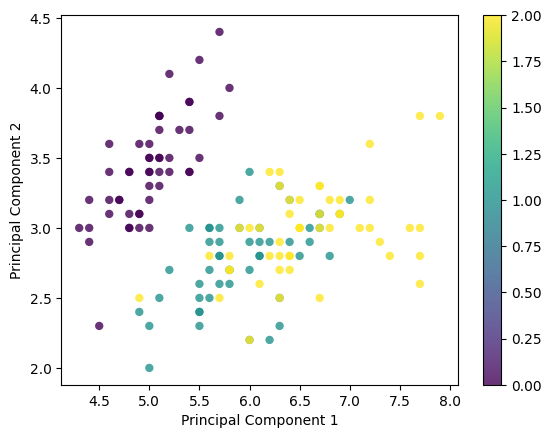

In [51]:
x1 = np.real(X[:, 0])
x2 = np.real(X[:, 1])

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.viridis)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

### Examlpe with Iris Dataset

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


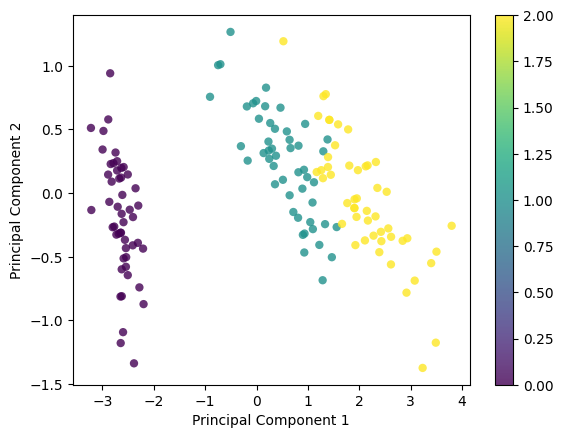

In [49]:
from sklearn import datasets

data = datasets.load_iris()
X = data.data
y = data.target

pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.viridis)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()